## Import and initialize

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import gaussian_filter1d

In [3]:
import ZernikeModelling
import zernike
import PolySin

In [33]:
importlib.reload(ZernikeModelling)
importlib.reload(zernike)

<module 'zernike' from '/media/sleepypanda/New Volume1/Personal/Research Works/CASSA IUB Chronos/Codes/Everybeam/zernike.py'>

In [27]:
start_freq = 120
end_freq = 180
interval = 1
modes = 200
thresh = 13  # Optimum value taken from section below
#energy_trun_ratio = 0.5
min_coverage = 0.5

freqs = np.arange(start_freq,end_freq+1,interval)  

dout = "/home/sleepypanda/Desktop/CASSA IUB Chronos/Codes/Everybeam/output/"

## Zernike Modelling

In [28]:
coef_compressed, coef_comp, J_comp = ZernikeModelling.compressed_zernike(start_freq, end_freq, interval, modes, thresh)


=== Beam Generation ===
Progress:
🔍 Checking memmap data validity...
✅ Loaded existing memmap: beams_memmap.npy
   Shape: (61, 340, 340, 2, 2), Dtype: complex128
✅ Beam data already available, skipping regeneration.
🔍 Checking memmap data validity...
✅ Loaded existing memmap: zernike_memmap.npy
   Shape: (61, 2, 2, 2, 200), Dtype: float64
🔍 Checking memmap data validity...
✅ Loaded existing memmap: sortind_memmap.npy
   Shape: (2, 2, 2, 200), Dtype: int64
✅ Using cached Zernike coefficients and sorting indices.

=== Compressing J_00 ===
Real components:
Unique Noll indices found: 13
Fitting indices with coverage ≥ 100%: 13
Progress: 1/13 2/13 3/13 4/13 5/13 6/13 7/13 8/13 9/13 10/13 11/13 12/13 13/13 
Fitting completed: 13/13 succeeded
Compression ratio ~ 8.71:1 (793 -> 91 params)
Imaginary components:
Unique Noll indices found: 13
Fitting indices with coverage ≥ 100%: 13
Progress: 1/13 2/13 3/13 4/13 5/13 6/13 7/13 8/13 9/13 10/13 11/13 12/13 13/13 
Fitting completed: 13/13 succeeded

In [19]:
# np.save(dout + 'coef_compressed.npy', coef_compressed, allow_pickle=True)

In [8]:
# compressed_zernike = np.load(dout + 'coef_compressed.npy', allow_pickle=True)

In [9]:
# coef_comp = np.load(dout + 'recon_coef_HBA_%i_to_%i_with%iInterval.npy'%(start_freq,end_freq,interval))

## Jones Matrix Reconstruction and Checking

In [29]:
coef_recon = ZernikeModelling.spectral_recon(freqs, coef_comp, coef_compressed)

In [11]:
# J_comp = np.load(dout + 'beam_HBA_%i_to_%i_with%iInterval.npy'%(start_freq,end_freq,interval))

In [107]:
print(coef_recon.shape)
print(coef_comp.shape)
print(J_comp.shape)

(61, 2, 2, 2, 2, 15)
(61, 2, 2, 2, 2, 15)
(61, 340, 340, 2, 2)


In [97]:
def print_coef_stats(name_a, a, name_b, b):
    a = np.asarray(a)
    b = np.asarray(b)
    diff = a - b
    l2 = np.linalg.norm(diff.ravel())
    maxabs = np.max(np.abs(diff))
    rel = l2 / (np.linalg.norm(a.ravel()) + 1e-30)
    print(f"{name_a} vs {name_b}: L2 diff = {l2:.6e}, max|diff| = {maxabs:.6e}, rel = {rel:.6e}")

In [135]:
print_coef_stats("coef_comp", coef_comp, "coef_recon", coef_recon)
print_coef_stats("Jz_recon", Jz_recon, "Jfinal_recon", Jfinal_recon)

coef_comp vs coef_recon: L2 diff = 4.225652e-02, max|diff| = 5.960782e-03, rel = 1.513549e-05
Jz_recon vs Jfinal_recon: L2 diff = 3.704134e+00, max|diff| = 6.239091e-03, rel = 3.488702e-03


In [30]:
Jz_recon = ZernikeModelling.reconstruct_jones(J_comp, coef_comp)


=== Reconstructing Jones Matrices ===
Progress:
1/61 | 2/61 | 3/61 | 4/61 | 5/61 | 6/61 | 7/61 | 8/61 | 9/61 | 10/61 | 11/61 | 12/61 | 13/61 | 14/61 | 15/61 | 16/61 | 17/61 | 18/61 | 19/61 | 20/61 | 21/61 | 22/61 | 23/61 | 24/61 | 25/61 | 26/61 | 27/61 | 28/61 | 29/61 | 30/61 | 31/61 | 32/61 | 33/61 | 34/61 | 35/61 | 36/61 | 37/61 | 38/61 | 39/61 | 40/61 | 41/61 | 42/61 | 43/61 | 44/61 | 45/61 | 46/61 | 47/61 | 48/61 | 49/61 | 50/61 | 51/61 | 52/61 | 53/61 | 54/61 | 55/61 | 56/61 | 57/61 | 58/61 | 59/61 | 60/61 | 61/61 | 
=== Reconstruction Completed ===


In [31]:
Jfinal_recon = ZernikeModelling.reconstruct_jones(J_comp, coef_recon)


=== Reconstructing Jones Matrices ===
Progress:
1/61 | 2/61 | 3/61 | 4/61 | 5/61 | 6/61 | 7/61 | 8/61 | 9/61 | 10/61 | 11/61 | 12/61 | 13/61 | 14/61 | 15/61 | 16/61 | 17/61 | 18/61 | 19/61 | 20/61 | 21/61 | 22/61 | 23/61 | 24/61 | 25/61 | 26/61 | 27/61 | 28/61 | 29/61 | 30/61 | 31/61 | 32/61 | 33/61 | 34/61 | 35/61 | 36/61 | 37/61 | 38/61 | 39/61 | 40/61 | 41/61 | 42/61 | 43/61 | 44/61 | 45/61 | 46/61 | 47/61 | 48/61 | 49/61 | 50/61 | 51/61 | 52/61 | 53/61 | 54/61 | 55/61 | 56/61 | 57/61 | 58/61 | 59/61 | 60/61 | 61/61 | 
=== Reconstruction Completed ===


/media/sleepypanda/New Volume1/Personal/Research Works/CASSA IUB Chronos/Codes/Everybeam/zernike.py:341: RuntimeWarning: divide by zero encountered in log10
  


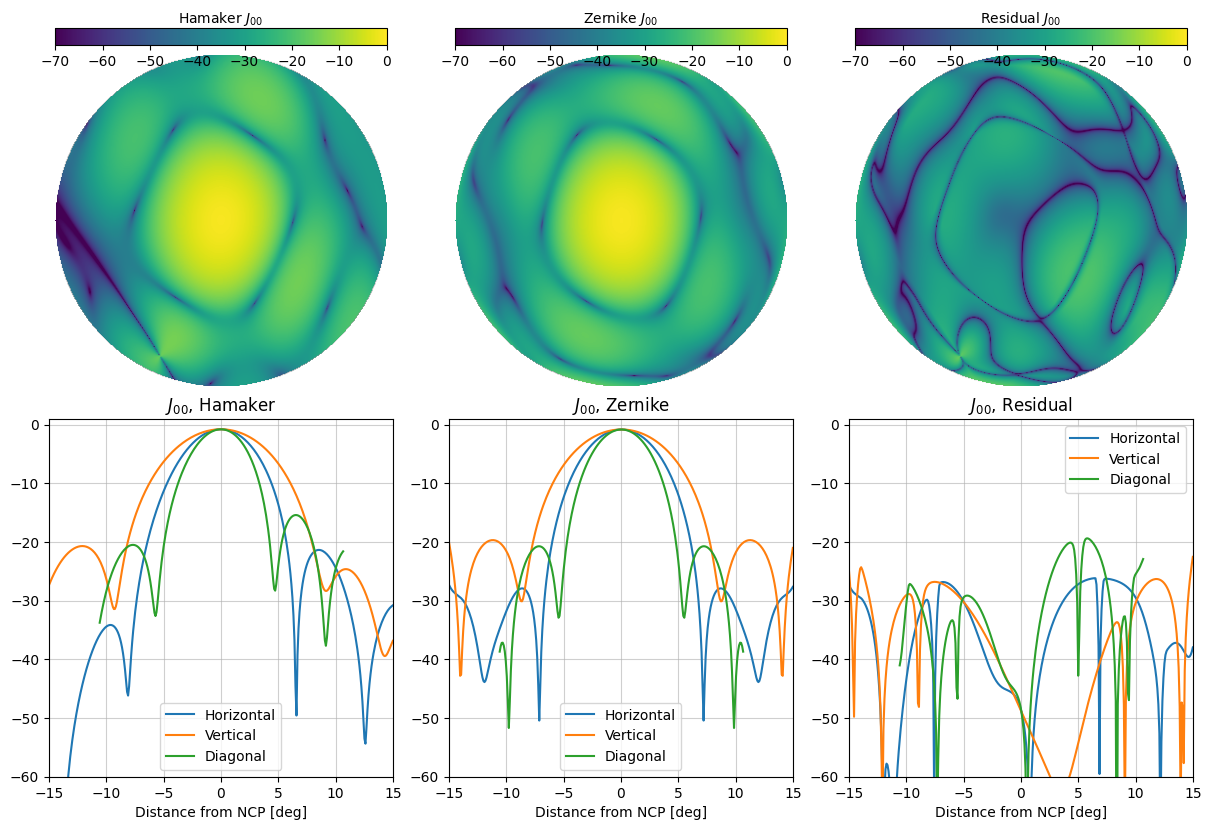

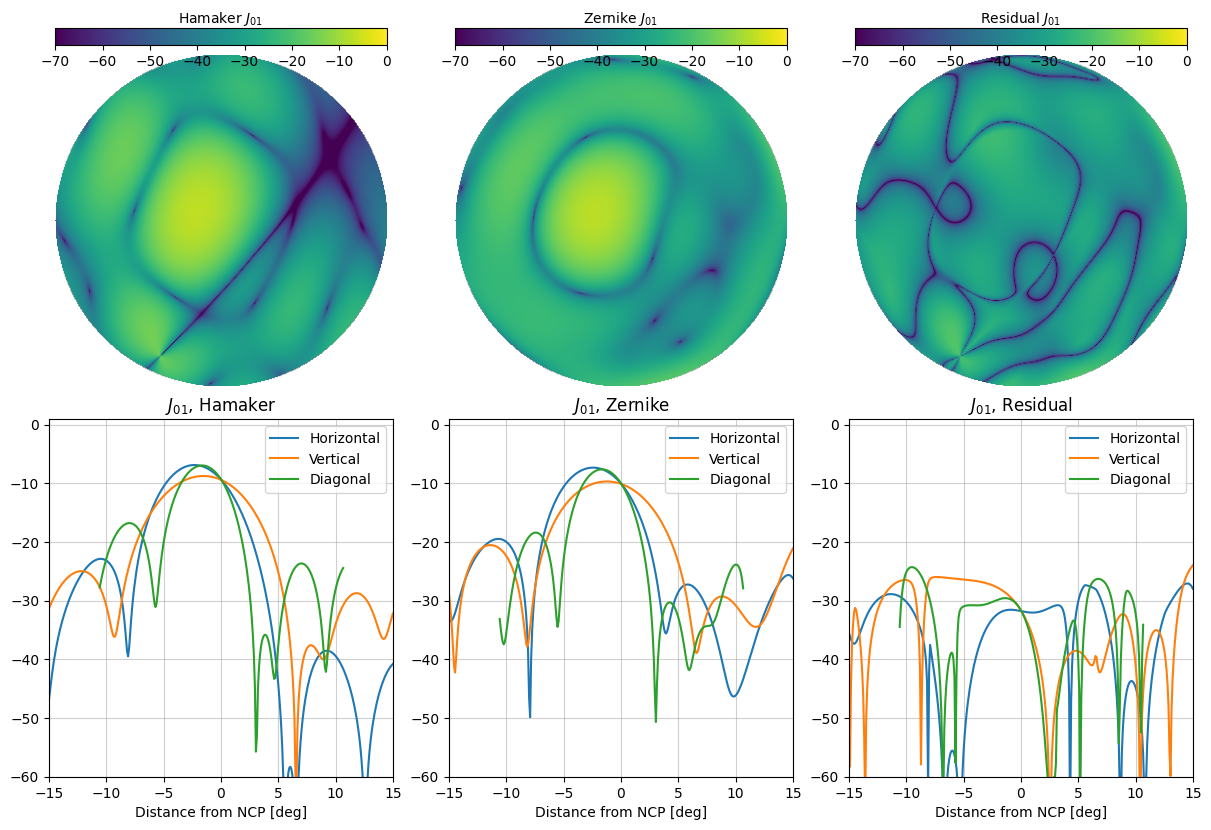

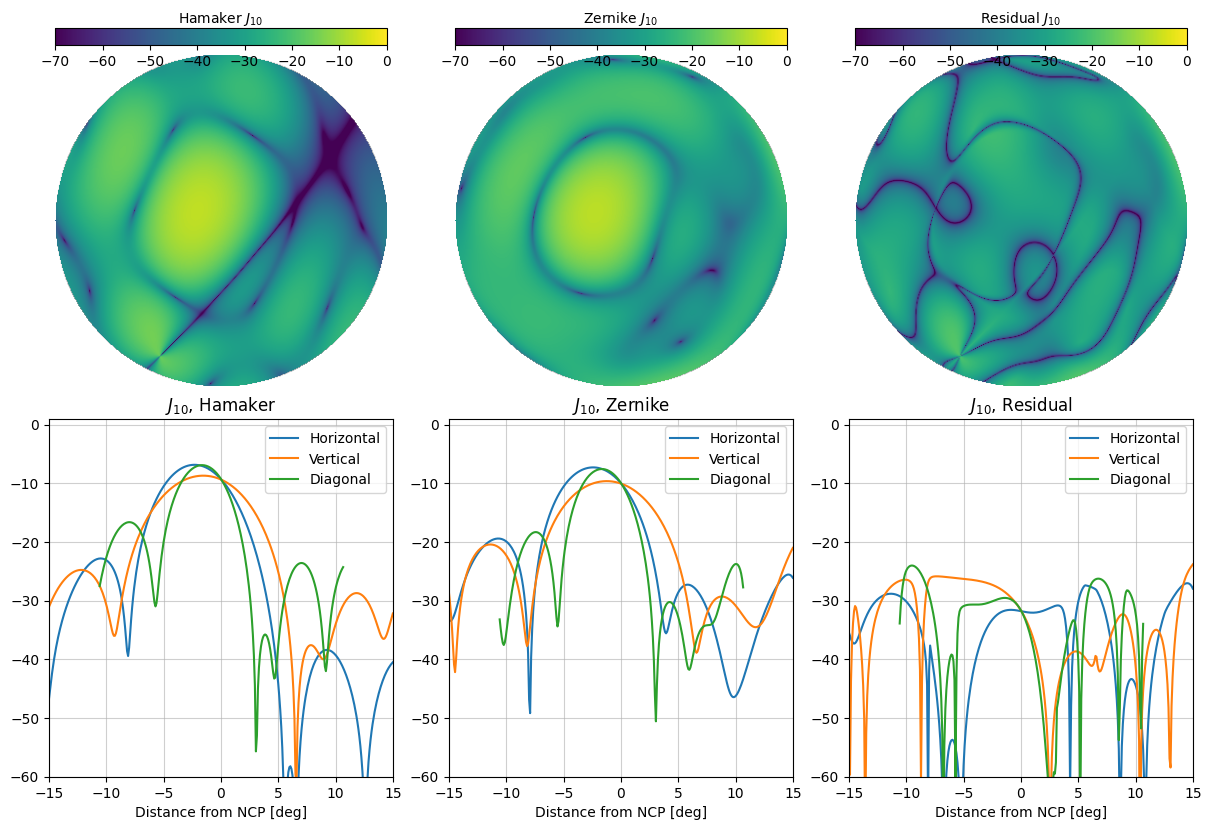

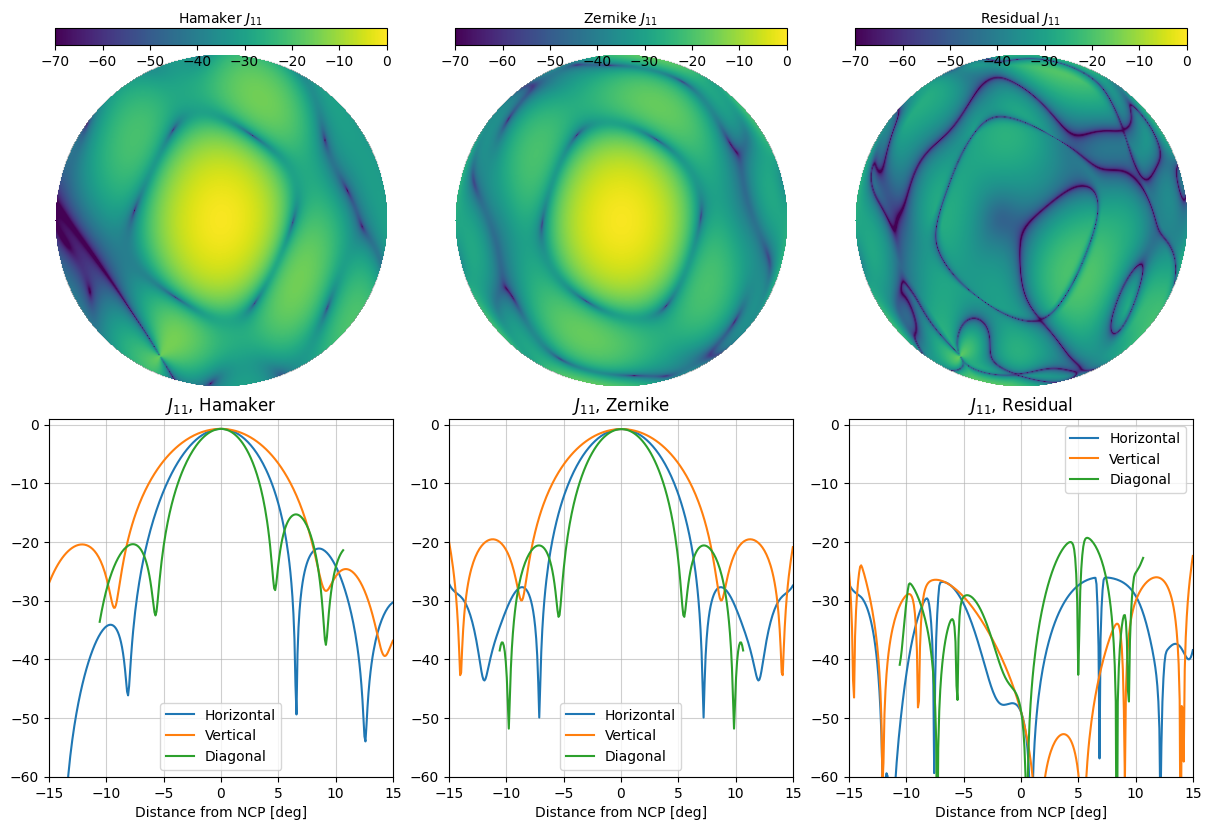

In [34]:
coef = coef_recon[10]
Jzr = Jfinal_recon[10]

for i in range(2):
    for j in range(2):
        zernike.jones_plot(Jzr[:,:,:,j,i],i,j)

## Normalized Mean Root Square Error (NMRSE)

In [9]:
nmrse_comp1 = ZernikeModelling.calc_nmrse(Jz_recon)
nmrse_comp2 = ZernikeModelling.calc_nmrse(Jfinal_recon)

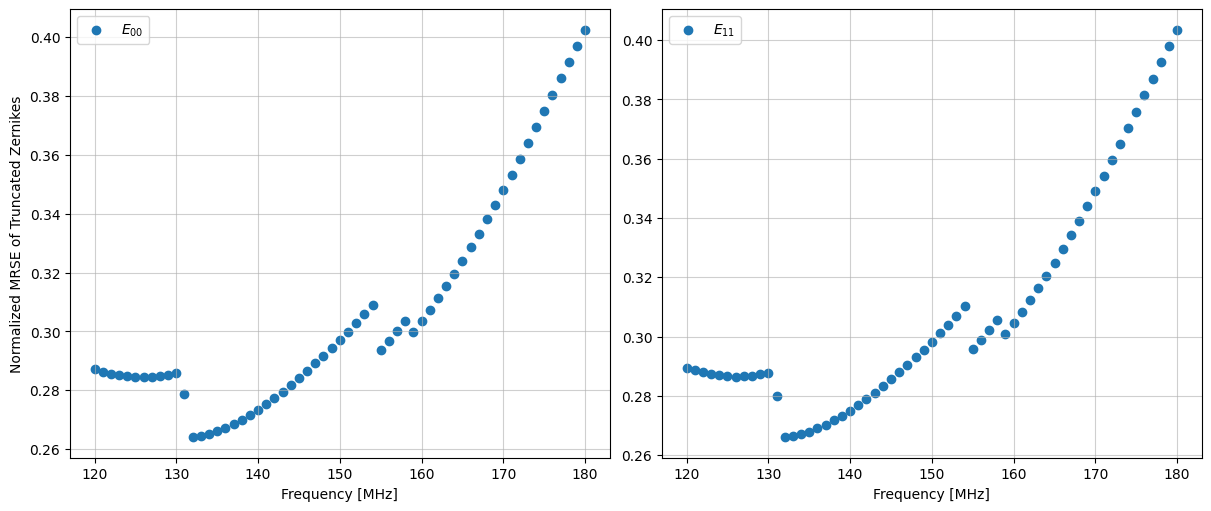

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for i in range(2):
    ax[i].scatter(freqs, nmrse_comp1[:,i,i], label="$E_{%i%i}$"%(i,i))

    ax[i].set_xlabel('Frequency [MHz]')
    # ax[i].set_ylim([0,0.5])
    # ax[i].set_xlim([20,80])
    ax[i].grid(alpha=.6)
    ax[i].legend()    

ax[0].set_ylabel('Normalized MRSE of Truncated Zernikes')
plt.show()

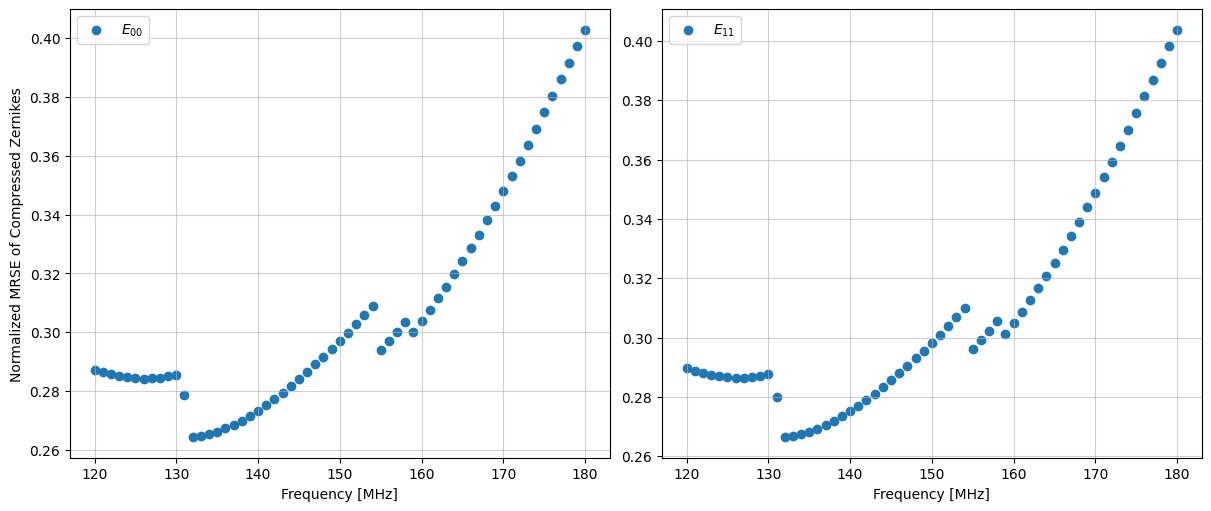

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

#interval = 5
#freq = np.arange(start_freq,end_freq+1,interval)

for i in range(2):
    ax[i].scatter(freqs, nmrse_comp2[:,i,i], label="$E_{%i%i}$"%(i,i))

    ax[i].set_xlabel('Frequency [MHz]')
    # ax[i].set_ylim([0,0.5])
    # ax[i].set_xlim([20,80])
    ax[i].grid(alpha=.6)
    ax[i].legend()    

ax[0].set_ylabel('Normalized MRSE of Compressed Zernikes')
plt.show()

In [13]:
diff = nmrse_comp1 - nmrse_comp2

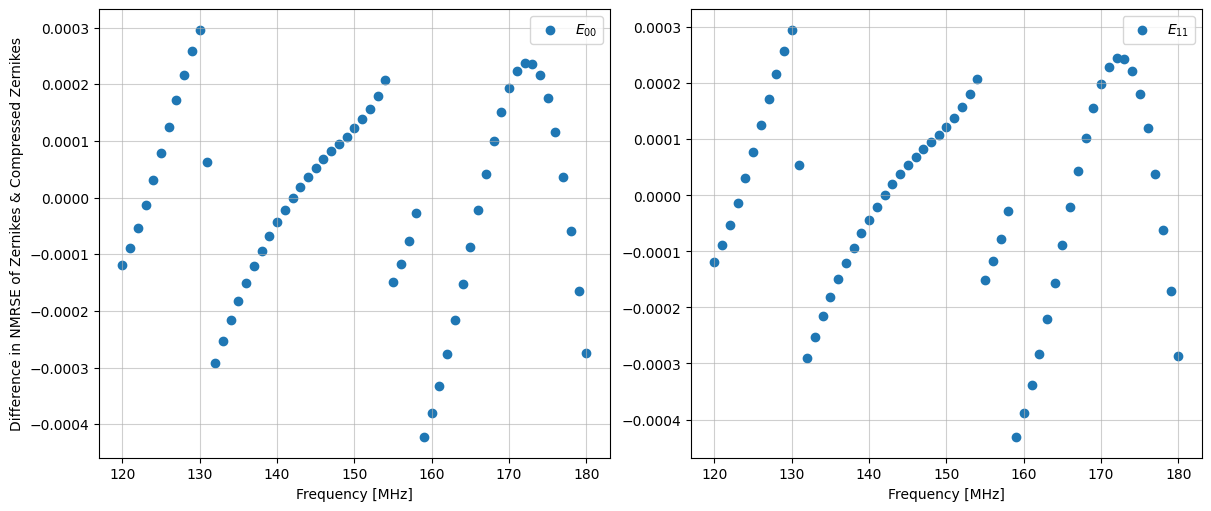

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for i in range(2):
    ax[i].scatter(freqs, diff[:,i,i], label="$E_{%i%i}$"%(i,i))

    ax[i].set_xlabel('Frequency [MHz]')
    # ax[i].set_ylim([0,0.5])
    # ax[i].set_xlim([20,80])
    ax[i].grid(alpha=.6)
    ax[i].legend()    

ax[0].set_ylabel('Difference in NMRSE of Zernikes & Compressed Zernikes')
plt.show()

## Calculating optimum threshold

In [147]:
thresh_list = np.arange(12, 14+1, 1)


=== Beam Generation ===
Progress:
🔍 Checking memmap data validity...
   Finite values: 100.00%
 Memmap loaded successfully: beams_memmap.npy
   Shape: (61, 340, 340, 2, 2), Dtype: complex128, Size: 28,206,400 elements
🔍 Checking memmap data validity...
   Finite values: 100.00%
 Memmap loaded successfully: zernike_memmap.npy
   Shape: (61, 2, 2, 2, 200), Dtype: float64, Size: 97,600 elements
🔍 Checking memmap data validity...
   Finite values: 100.00%
 Memmap loaded successfully: sortind_memmap.npy
   Shape: (2, 2, 2, 200), Dtype: int64, Size: 1,600 elements

=== Compressing J_00 ===
Real components:
Unique Noll indices found: 12
Fitting indices with coverage ≥ 100%: 12
Progress: 1/12 2/12 3/12 4/12 5/12 6/12 7/12 8/12 9/12 10/12 11/12 12/12 
Fitting completed: 12/12 succeeded
Compression ratio ~ 8.71:1 (732 -> 84 params)
Imaginary components:
Unique Noll indices found: 12
Fitting indices with coverage ≥ 100%: 12
Progress: 1/12 2/12 3/12 4/12 5/12 6/12 7/12 8/12 9/12 10/12 11/12 12/12

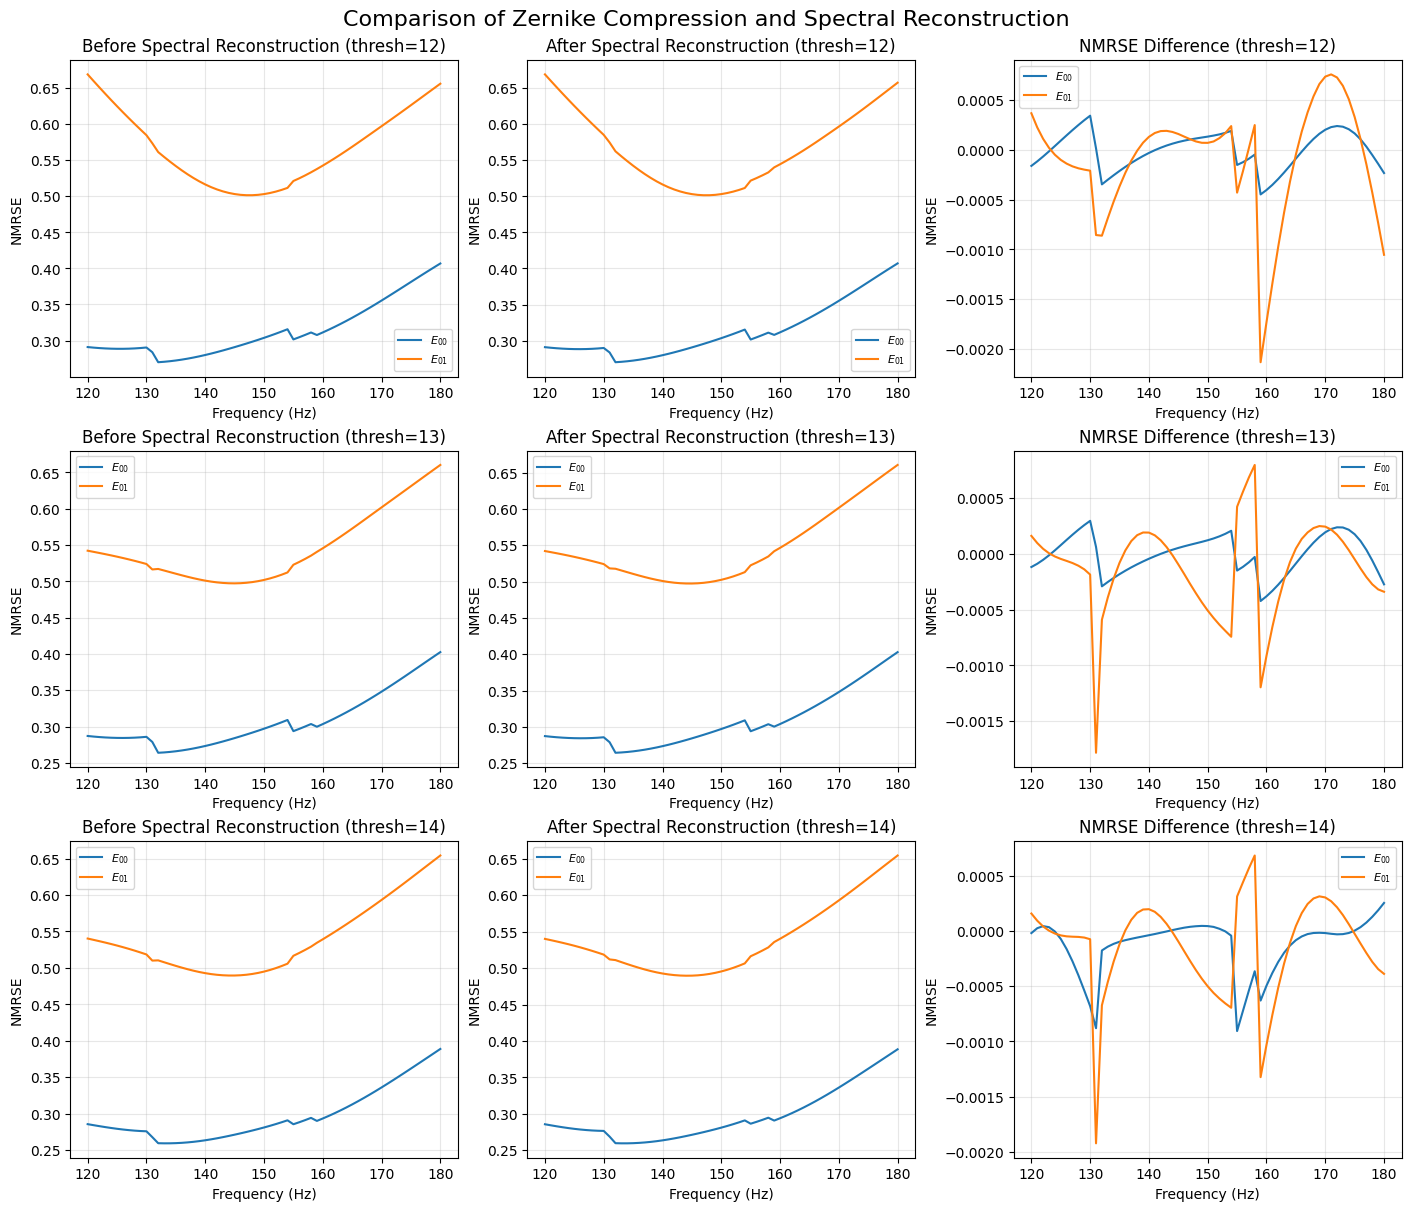

In [148]:
fig, ax = plt.subplots(
    len(thresh_list), 3, figsize=(14, 4 * len(thresh_list)), constrained_layout=True
)

for idx, thresh in enumerate(thresh_list):
    coef_compressed, coef_comp, J_comp = ZernikeModelling.compressed_zernike(start_freq, 
                                                                             end_freq, 
                                                                             interval, 
                                                                             modes, 
                                                                             thresh)
    coef_recon = ZernikeModelling.spectral_recon(freqs, coef_comp, coef_compressed)
    Jz_recon = ZernikeModelling.reconstruct_jones(J_comp, coef_comp)
    Jfinal_recon = ZernikeModelling.reconstruct_jones(J_comp, coef_recon)

    nmrse_comp1 = ZernikeModelling.calc_nmrse(Jz_recon)
    nmrse_comp2 = ZernikeModelling.calc_nmrse(Jfinal_recon)
    diff = nmrse_comp1 - nmrse_comp2

    # Plot results for Jones matrix components
    for i in range(2):
        label = f"$E_{{0{i}}}$"
        ax[idx, 0].plot(freqs, nmrse_comp1[:, 0, i], label=label)
        ax[idx, 1].plot(freqs, nmrse_comp2[:, 0, i], label=label)
        ax[idx, 2].plot(freqs, diff[:, 0, i], label=label)

    # Titles for each row
    ax[idx, 0].set_title(f"Before Spectral Reconstruction (thresh={thresh})")
    ax[idx, 1].set_title(f"After Spectral Reconstruction (thresh={thresh})")
    ax[idx, 2].set_title(f"NMRSE Difference (thresh={thresh})")

    # Common labels
    for k in range(3):
        ax[idx, k].set_xlabel("Frequency (Hz)")
        ax[idx, k].set_ylabel("NMRSE")
        ax[idx, k].legend(fontsize=8)
        ax[idx, k].grid(True, alpha=0.3)

plt.suptitle("Comparison of Zernike Compression and Spectral Reconstruction", fontsize=16)
plt.show()

## Freq-averaged energies for top strongest zernike coeffs

In [25]:
ener_comp = coef_recon[:,:,:,1,:,:]**2
ener_avg = np.mean(ener_comp[:,:,:,:,:], axis=0)

sortind_noll = coef_recon[0,:,:,0,:,:] # nolls are the same for every frequency
sortind_nm = np.empty((2,2,2,thresh,2))

for i in range(2):
    for j in range(2):
        sort_cr = sortind_noll[i,j,0]
        sort_ci = sortind_noll[i,j,1]

        sort_cr = [zernike.noll_to_zern(noll) for noll in sort_cr]
        sort_ci = [zernike.noll_to_zern(noll) for noll in sort_ci]
        sortind_nm[i][j] = np.array([sort_cr, sort_ci])

sortind_noll = coef_recon.astype(int)
sortind_nm = sortind_nm.astype(int)

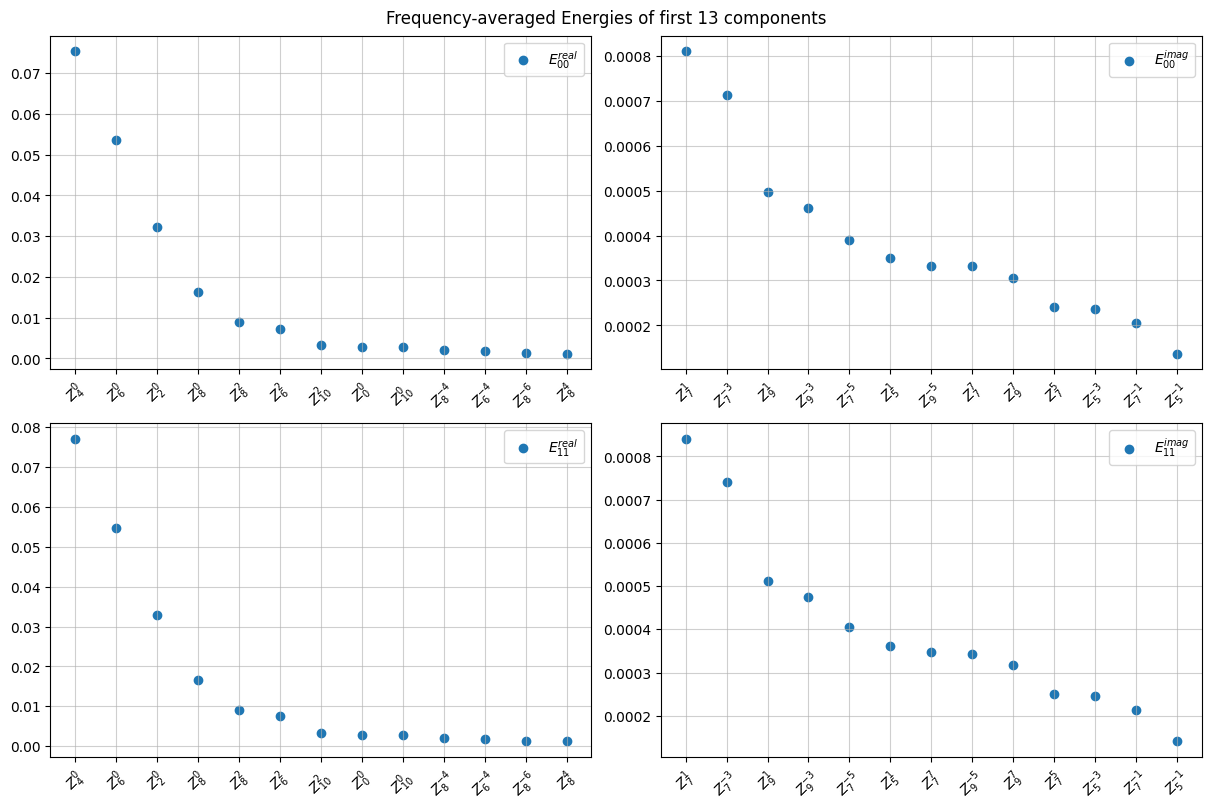

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

num_coef = thresh

# trun_sortind_noll = sortind_noll[:,:,:,:num_coef]
trun_sortind_nm = sortind_nm[:,:,:,:num_coef,:]
# trun_sortind_n = sortind_n[:,:,:,0:num_coef]
# trun_sortind_m = sortind_m[:,:,:,0:num_coef]

for i in range(2):
    # r = i//2
    # c = i%2
    ax[i][0].scatter(range(num_coef),ener_avg[i,i,0],
                     label="$E_{%i%i}^{real}$"%(i,i))
    ax[i][0].set_xticks(range(num_coef))
    labels_r = [f'$Z_{{{i}}}^{{{j}}}$' for i,j in np.column_stack((trun_sortind_nm[i,i,0,:,0],
                                                                   trun_sortind_nm[i,i,0,:,1]))]
    ax[i][0].set_xticklabels(labels_r, rotation=45)
    ax[i][0].legend()
    ax[i][0].grid(alpha=.6)
    
    ax[i][1].scatter(range(num_coef),ener_avg[i,i,1],
                     label="$E_{%i%i}^{imag}$"%(i,i))
    ax[i][1].set_xticks(range(num_coef))
    labels_i = [f'$Z_{{{i}}}^{{{j}}}$' for i,j in np.column_stack((trun_sortind_nm[i,i,1,:,0],
                                                                   trun_sortind_nm[i,i,1,:,1]))]
    ax[i][1].set_xticklabels(labels_i, rotation=45)
    ax[i][1].legend()
    ax[i][1].grid(alpha=.6)
    
    # ax[i].set_xlabel('Frequency [MHz]')
    # ax[i].set_ylim([0,0.5])
    # ax[i].set_xlim([20,80])
    
        

fig.suptitle("Frequency-averaged Energies of first %s components"%num_coef)
plt.show()

## Energies of top strongest zernike coeffs across frequencies

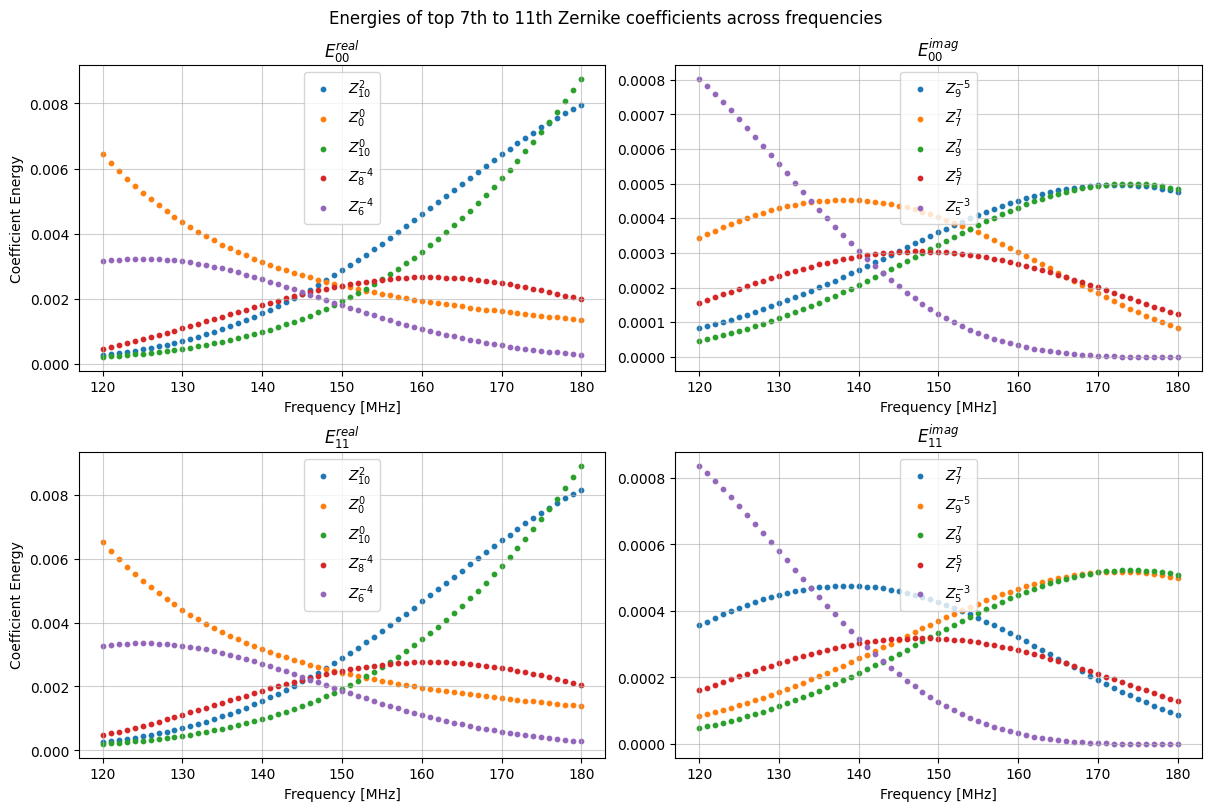

In [24]:
#sortind_noll = np.load(dout + 'sortind_HBA_%i_to_%i_with%iInterval.npy'%(start_freq,end_freq,interval))

fig, ax = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

num_coef = 5
start_coef = 7
startind = start_coef-1
endind = startind + num_coef

trun_sortind_nm = sortind_nm[:,:,:,startind:endind,:]
trun_ener_comp = ener_comp[:,:,:,:,startind:endind]

#sigma = 5

for i in range(2):
    # r = i // 2
    # c = i % 2
    
    # trun_ener_r = [sorted_energy_comp[(r,c,0)][ind] for ind in list(sorted_energy_comp[(r,c,0)].keys())[startind:endind]]
    # trun_ener_i = [sorted_energy_comp[(r,c,1)][ind] for ind in list(sorted_energy_comp[(r,c,1)].keys())[startind:endind]]
    
    for j in range(num_coef):
        # ax[i][0].plot(freq,gaussian_filter1d(ener_comp[:,r,c,0,trun_sortind_noll[r,c,0,j]], sigma),
        #               label="$Z_{%i}^{%i}$"%(trun_sortind_nm[r,c,0,j,0],trun_sortind_nm[r,c,0,j,1]))
        ax[i][0].scatter(freqs, trun_ener_comp[:,i,i,0,j], s = 10,
                      label="$Z_{%i}^{%i}$"%(trun_sortind_nm[i,i,0,j,0],trun_sortind_nm[i,i,0,j,1]))
        
    if r==1 & c==1:
        ax[i][0].set_xlabel('Frequency [MHz]')
        ax[i][1].set_xlabel('Frequency [MHz]')

    ax[i][0].set_title(f'$E_{{{i}{i}}}^{{real}}$')
    ax[i][0].set_ylabel('Coefficient Energy')
    ax[i][0].legend()
    ax[i][0].grid(alpha=.6)
    
    for j in range(num_coef):
        # ax[i][1].plot(freq,gaussian_filter1d(ener_comp[:,r,c,1,trun_sortind_noll[r,c,1,j]], sigma),
        #               label="$Z_{%i}^{%i}$"%(trun_sortind_nm[r,c,1,j,0],trun_sortind_nm[r,c,1,j,1]))
        ax[i][1].scatter(freqs, trun_ener_comp[:,i,i,1,j], s = 10,
                      label="$Z_{%i}^{%i}$"%(trun_sortind_nm[i,i,1,j,0],trun_sortind_nm[i,i,1,j,1]))
        
    ax[i][1].set_title(f'$E_{{{i}{i}}}^{{imag}}$')
    ax[i][1].legend()
    ax[i][1].grid(alpha=.6)
    # ax[i][1].set_xticks(range(num_coef))
    # labels_i = [f'$Z_{{{i}}}^{{{j}}}$' for i,j in np.column_stack((trun_sortind_n[r,c,1],trun_sortind_m[r,c,1]))]
    # ax[i][1].set_xticklabels(labels_i, rotation=45)
    
    # ax[i].set_ylim([0,0.5])
    # ax[i].set_xlim([20,80])
    
        

fig.suptitle("Energies of top %ith to %ith Zernike coefficients across frequencies"%(startind+1, endind))
plt.show()